# **1. Importing Data and Imputing Missing Values**

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('german_credit_data_with_target.csv')

In [3]:
df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


We can see that we only have missing values in two columns (Saving accounts & Checking account).

I think we can assume that NaNs in both of these columns imply that these people don't have bank accounts. Because if they did, I think that would've been logged into the data. Hence, we can fill in this missing values with 'none'.

In [4]:
df.isna().sum()


Unnamed: 0            0
Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

In [5]:
for col in ['Saving accounts', 'Checking account']:
    df[col].fillna('none', inplace=True)

Let's encode the actual values for jobs as described in the data description. This will make plots easier to read.

In [6]:
j = {0: 'unskilled and non-res', 1: 'unskilled and res', 2: 'skilled', 3: 'highly skilled'}
df['Job'] = df['Job'].map(j)

df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,skilled,own,none,little,1169,6,radio/TV,good
1,1,22,female,skilled,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,unskilled and res,own,little,none,2096,12,education,good
3,3,45,male,skilled,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,skilled,free,little,little,4870,24,car,bad


# **2. EDA & Data Visualization**

**2.1.Distribution of Risk across Job Type and Gender** <br>
Observations:

1.   Skilled workers are more likely to get 'good' risk rating. This makes sense, as skilled workers tend to earn more and have more job security.

2.   Men, throughout all job types, tend to get a 'good' rating much more often than women. Skilled female workers are more commonly classified as 'bad' than 'good'. This hints towards institutional sexism.




C:\Anaconda\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


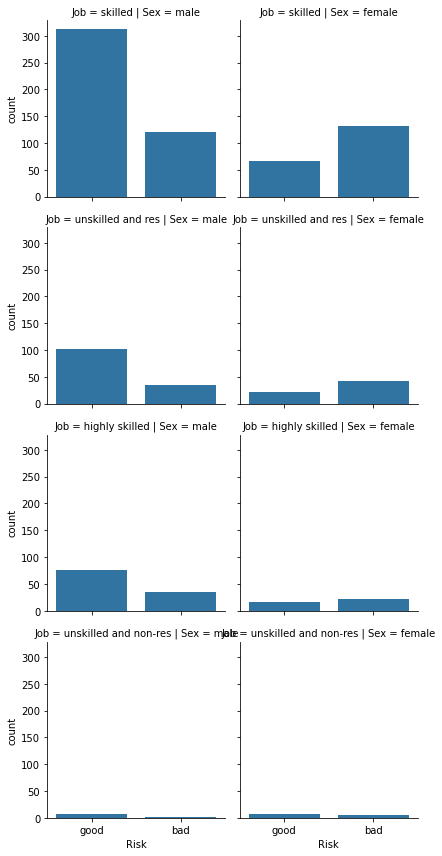

In [7]:
g = sns.FacetGrid(df, col="Sex",  row="Job")
g = g.map(sns.countplot, "Risk")

**2.2. Distribution of Risk across Housing Status** <br>
Observations:

1.   People who own their own home are more likely to get a 'good' risk rating on their credit compared to people who rent. This is obvious as credit worthiness goes hand in hand with asset ownership.





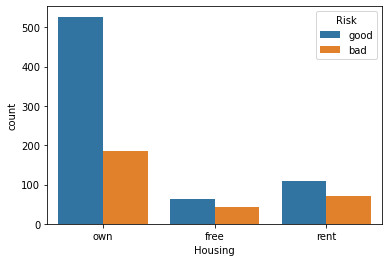

In [8]:
sns.countplot(x="Housing", hue="Risk", data=df)
plt.show()

**2.3. Distribution of Risk across Bank Account Status** <br>
Observations:

1.   When it comes to checking accounts, the richer you are, the more likely you are to be classified as 'good'. However, the disparity between 'good' and 'bad' risk ratings when it comes to 'none' is quite astounding. Remember, these are the people who had 'NaN' in the Checking Account column in the original dataset.
2.   When it comes to saving accounts, the trend holds as well. The richer you are, the more likley you are to be classified as good. However, unlike checking accounts, where those with 'little' money have equal distribution of good and bad ratings, in savings accounts, there are visibly more good ratings than bad ones. This makes sense since the very existence of a savings account implies some degree of financial security.






C:\Users\SAHILR~1\AppData\Local\Temp/ipykernel_30420/1466254135.py:8: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


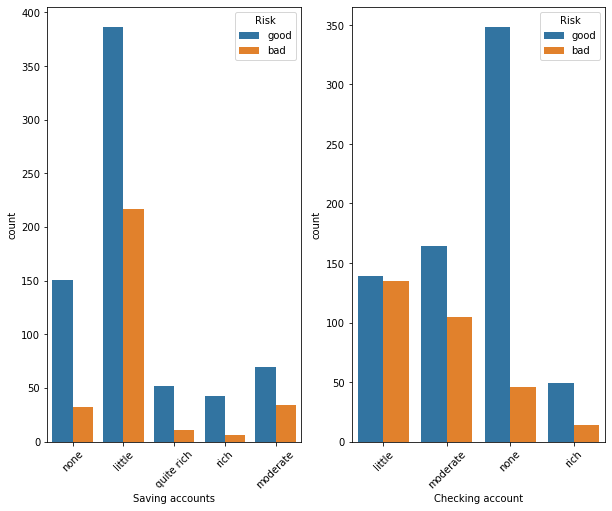

In [9]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,8))
sns.countplot(x="Saving accounts", hue="Risk", data=df, ax=ax1)
sns.countplot(x="Checking account", hue="Risk", data=df, ax=ax2)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45)


fig.show()

**2.4. Boxplots of Distribution of Credit Amounts Across Several Variables**
Observations:

1.   We notice quite a number of interesting things when we look at the 'Credit Amount Distribution by Purpose'. Firstly, we can see that certain 'purposes' are more likely to have 'bad'ratings, specially if the loan amount is high. For example, if we look at vacation/others, we can see that 'bad' rated loans usually consist of a higher amount. Same can be observed for business loans. Generally, if we exclude furniture/equipment and repairs categories, almost all other categories have a larger interquartile range when it comes to the credit amounts of 'bad' loans.
2.   The radio/TV category has a lot of outliers, specially for loans classified as 'good'. This is quite interesting. It is hard to imagine why a person would borrow 15000 DMs from the bank just to buy a radio or a TV, let alone get his loan approved.
3.   When we look at the amount distributions according to bank account statuses, we observe that rich people tend to borrow less compared to poorer people. On one hand, this makes sense as poor people need more money to take care of their needs. On the other hand, it doesn't make sense for a relatively rich person to borrow a very small amount from the bank.
4.   When it comes to job types, skilled workers tend to have a bigger and higher IQR for bad loans than for good loans. This makes sense since larger amounts are more likely to be classified as 'bad'. However, if we look at unskilled borrowers, this disparity doesn't hold true.










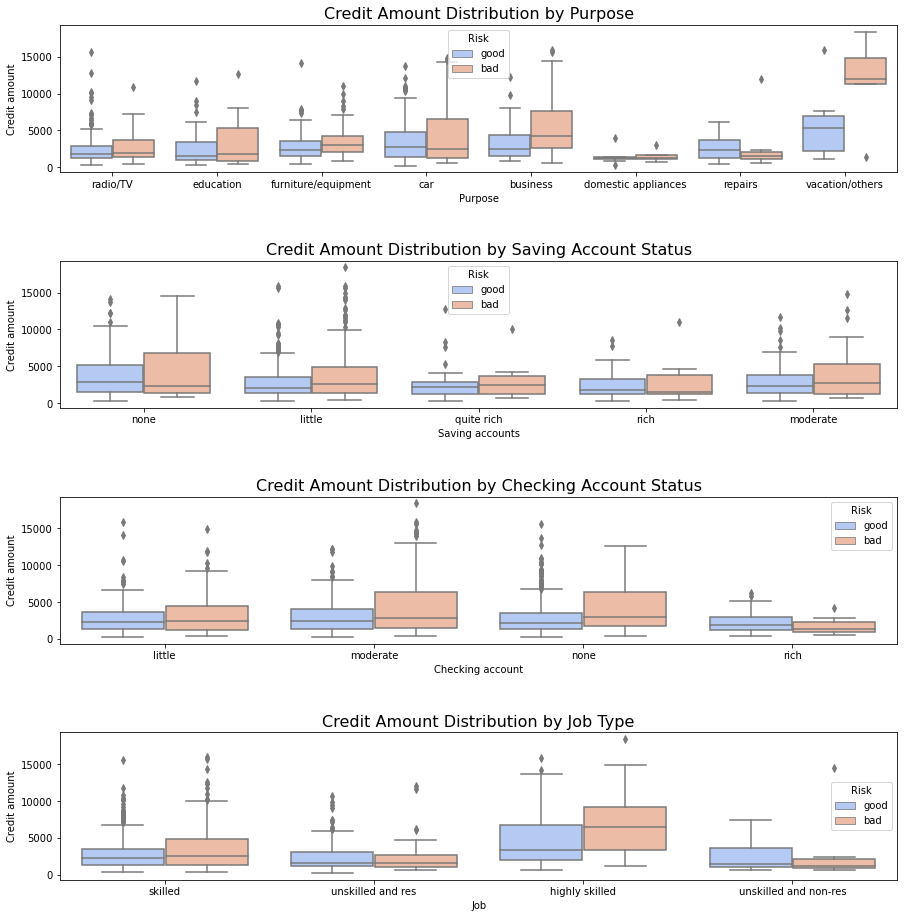

In [10]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4,1, figsize=(15,25))

sns.boxplot(x="Purpose", y="Credit amount", data=df, hue="Risk", palette="coolwarm", ax=ax1)
sns.boxplot(x="Saving accounts", y="Credit amount", data=df, hue="Risk", palette="coolwarm", ax=ax2)
sns.boxplot(x="Checking account", y="Credit amount", data=df, hue="Risk", palette="coolwarm", ax=ax3)
sns.boxplot(x="Job", y="Credit amount", data=df, hue="Risk", palette="coolwarm", ax=ax4)

ax1.set_title("Credit Amount Distribution by Purpose", fontsize=16)
ax2.set_title("Credit Amount Distribution by Saving Account Status", fontsize=16)
ax3.set_title("Credit Amount Distribution by Checking Account Status", fontsize=16)
ax4.set_title("Credit Amount Distribution by Job Type", fontsize=16)

plt.subplots_adjust(hspace = 0.6, top = 0.6)
plt.show()

**2.5. Credit Amount Distribution by Age and Loan Duration** <br>
Observations: 


1. We can see that generally, throughout all age gaps, bad loans tend to be of a higher amount but when it comes to people over 55, this gap widens.  
2. We can see that when it comes to loan duration, bad and good loans amounts tend to move in tandem. Moreover, larger loans over a longer duration are more likely to be classified as 'good'





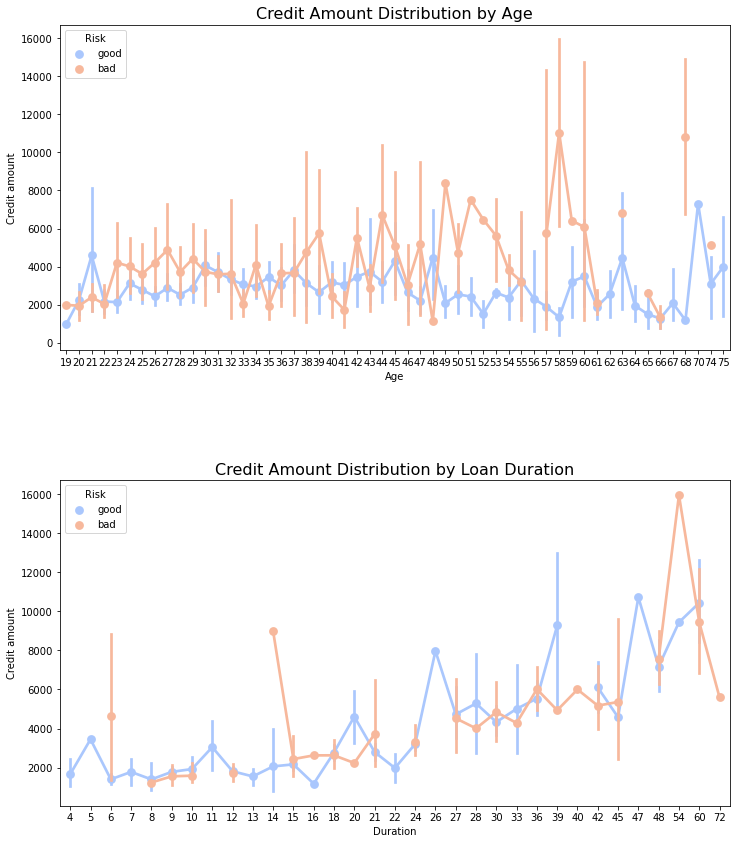

In [11]:
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(12,14))

sns.pointplot(x="Age", y="Credit amount", data=df, hue="Risk", palette="coolwarm", ax=ax1)
sns.pointplot(x="Duration", y="Credit amount", data=df, hue="Risk", palette="coolwarm", ax=ax2)

ax1.set_title("Credit Amount Distribution by Age", fontsize=16)
ax2.set_title("Credit Amount Distribution by Loan Duration", fontsize=16)

plt.subplots_adjust(wspace = 0.4, hspace = 0.4,top = 0.9)
plt.show()

# **3. Feature Engineering** <br>
**3.1. Getting Dummies** <br>
We need to generate dummies for our categorical variables and then drop the redundant variables. Moreover, as Risk is encoded as 'good' or 'bad'. We need to reencode this as binary. I am encoding 'bad' loans as 1 as from the bank's perspective, we are more interested in identifying bad loans.

In [12]:
# getting dummies for all the categorical variables
dummies_columns = ['Job', 'Purpose', 'Sex', 'Housing', 'Saving accounts', 'Checking account']
for col in dummies_columns:
    df = df.merge(pd.get_dummies(df[col], drop_first=True, prefix=str(col)), left_index=True, right_index=True) 

# encoding risk as binary
r = {"good":0, "bad": 1}
df['Risk'] = df['Risk'].map(r)

# drop redundant variables
columns_to_drop = ['Job', 'Purpose','Sex','Housing','Saving accounts','Checking account']
df.drop(columns_to_drop, axis=1, inplace=True)

df.head()

,Unnamed: 0,Age,Credit amount,Duration,Risk,Job_skilled,Job_unskilled and non-res,Job_unskilled and res,Purpose_car,Purpose_domestic appliances,...,Sex_male,Housing_own,Housing_rent,Saving accounts_moderate,Saving accounts_none,Saving accounts_quite rich,Saving accounts_rich,Checking account_moderate,Checking account_none,Checking account_rich
0,0,67,1169,6,0,1,0,0,0,0,...,1,1,0,0,1,0,0,0,0,0
1,1,22,5951,48,1,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
2,2,49,2096,12,0,0,0,1,0,0,...,1,1,0,0,0,0,0,0,1,0
3,3,45,7882,42,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,4,53,4870,24,1,1,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0


C:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Credit amount', ylabel='Density'>

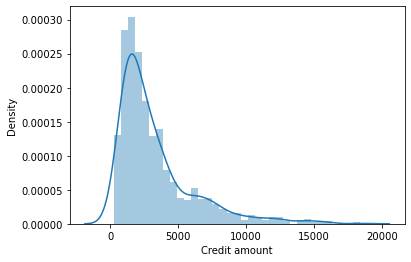

In [13]:
sns.distplot(df['Credit amount'])

Credit amount distribution is positively skewed.

**3.2. Making Credit Amount Distribution Normal**<br>
Instead of using the raw credit amount as our dependent variable, we need to get the log of these amounts. This will make our credit amount distribution more normal.

In [14]:
df['Log_CA'] = np.log(df['Credit amount'])

C:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Log_CA', ylabel='Density'>

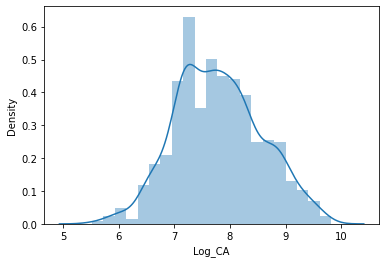

In [15]:
sns.distplot(df['Log_CA'])

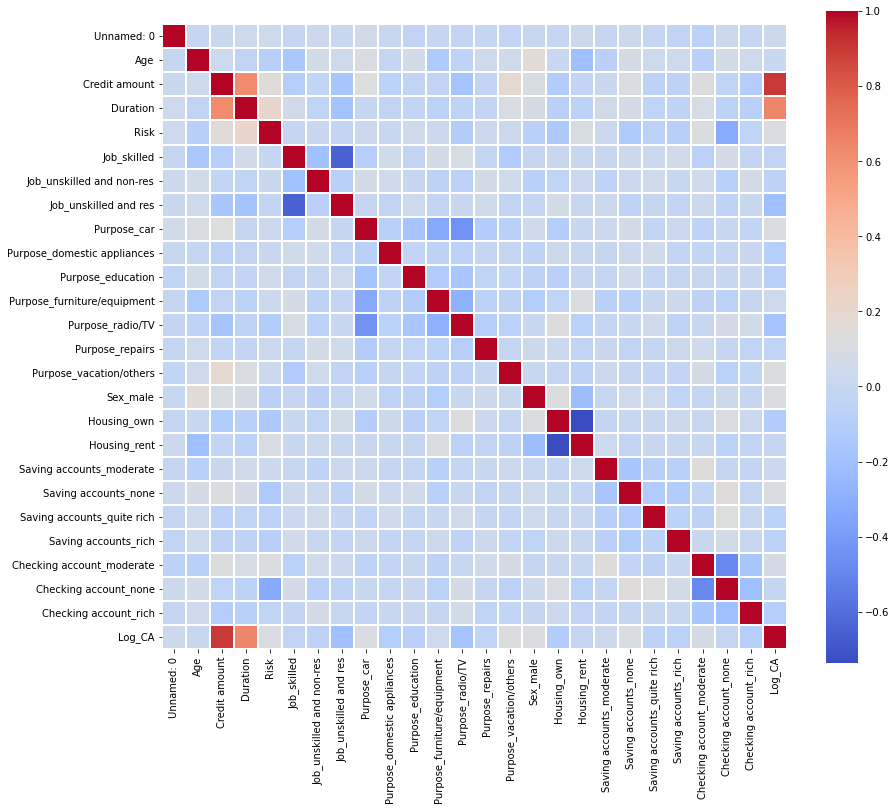

In [16]:
plt.figure(figsize=(14,12))
sns.heatmap(df.astype(float).corr(),linewidths=0.1,vmax=1.0, 
            square=True,  linecolor='white', cmap='coolwarm')
plt.show()

# **4. Base Models**<br>
I test a number of models. For models that have a range of hyperparameters, I run a grid-search first to identify the ideal hyperparameters.<br>

**Evaluation Metric:**<br>

I will be using 'Recall' as my evaluation metric. To revise, Recall is = True positives / (True positives + False negatives). In our case, the numerator will represent the correct number of bad loans that our algorithm correctly classified as bad while the denomintor will represent the numerator PLUS the bad loans that our algorithm incorrectly classified as 'good'. In other words, the closer the recall value is to 1, the more completely were we able to identify all the bad loans.

In [17]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

In [18]:
X = df.drop(['Risk', 'Credit amount'], axis=1).values
y = df['Risk'].values

# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=42)

**4.1. Logistic Regression**

In [19]:
log = LogisticRegression()
log.fit(X_train, y_train)
y_pred_log = log.predict(X_test)
print(accuracy_score(y_pred_log, y_test))
print(confusion_matrix(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))

0.725
[[126  15]
 [ 40  19]]
              precision    recall  f1-score   support

           0       0.76      0.89      0.82       141
           1       0.56      0.32      0.41        59

    accuracy                           0.73       200
   macro avg       0.66      0.61      0.61       200
weighted avg       0.70      0.72      0.70       200



C:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**4.2. K-Nearest Neighbors**

In [20]:
"""knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid={'n_neighbors':range(1,20)}, scoring='recall')
grid.fit(X_train, y_train)

grid.best_params_

for i in range(0, len(grid.cv_results_['mean_test_score'])):
    print('N_Neighbors {}: {} '.format(i+1, grid.cv_results_['mean_test_score'][i]*100))"""
    
# recall peaks at k = 1

knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
print(accuracy_score(y_pred_knn, y_test))
print(confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

    

0.595
[[95 46]
 [35 24]]
              precision    recall  f1-score   support

           0       0.73      0.67      0.70       141
           1       0.34      0.41      0.37        59

    accuracy                           0.59       200
   macro avg       0.54      0.54      0.54       200
weighted avg       0.62      0.59      0.60       200



**4.3. Support Vector Classification**

In [21]:
"""param_grid_svc = {"gamma": [0.1,0.5,1,5,10,50,100],
                  "C": [0.1,0.5,1,5,10,50,100]}

svc = SVC(kernel='linear')

gs_svc = GridSearchCV(svc, param_grid = param_grid_svc, cv=5, scoring='recall', verbose=4)
gs_svc.fit(X_train, y_train)

gs_svc.best_params_ """
# gamma = 10, C = 0.8

svc = SVC(kernel='linear', gamma=10, C=0.8)
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)
print(accuracy_score(y_pred_svc, y_test))
print(confusion_matrix(y_test, y_pred_svc))
print(classification_report(y_test, y_pred_svc))

0.74
[[128  13]
 [ 39  20]]
              precision    recall  f1-score   support

           0       0.77      0.91      0.83       141
           1       0.61      0.34      0.43        59

    accuracy                           0.74       200
   macro avg       0.69      0.62      0.63       200
weighted avg       0.72      0.74      0.71       200



**4.4. Random Forests**

In [22]:
"""param_grid_rf = {"max_depth": range(3,10),
                  "max_features": [3,5,7,9,11,13,15,17,20],
                  "min_samples_leaf": [5,10,15,20,25,30],
                  "n_estimators": [3,5,10,25,50,150]}

rf = RandomForestClassifier()
gs_rf = GridSearchCV(rf, param_grid=param_grid_rf, cv=5, scoring="recall", verbose=4)
gs_rf.fit(X_train, y_train)

gs_rf.best_params_
"""
# {'max_depth': 9, 'max_features': 15, 'min_samples_leaf': 5, 'n_estimators': 25}


rf = RandomForestClassifier(max_depth=9, max_features=15, min_samples_leaf=5, n_estimators=25)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print(accuracy_score(y_pred_rf, y_test))
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

0.76
[[130  11]
 [ 37  22]]
              precision    recall  f1-score   support

           0       0.78      0.92      0.84       141
           1       0.67      0.37      0.48        59

    accuracy                           0.76       200
   macro avg       0.72      0.65      0.66       200
weighted avg       0.75      0.76      0.74       200



**4.5. XGBoost**

In [23]:
"""param_grid_xgb = {"max_depth": range(3,10),
                  "subsample": [0.5,0.6,0.7,0.8,0.9,1],
                  "eta": [0.01,0.03,0.05,0.07,0.09,0.14,0.19],
                  "colsample_bytree": [0.5,0.6,0.7,0.8,0.9,1],
                  "n_estimators": [3,5,10,25,50,150]}

xgb = XGBClassifier()
gs_xgb = GridSearchCV(xgb, param_grid=param_grid_xgb, cv=5, scoring="recall", verbose=4)
gs_xgb.fit(X_train, y_train)

gs_xgb.best_params_ """

"""{'colsample_bytree': 1,
 'eta': 0.19,
 'max_depth': 8,
 'n_estimators': 150,
 'subsample': 0.8} """

xgb = XGBClassifier(eta=0.19, max_depth=8, n_estimators=150, subsample=0.8, colsample_bytree=1)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
print(accuracy_score(y_pred_xgb, y_test))
print(confusion_matrix(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))

C:\Anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[05:17:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.775
[[126  15]
 [ 30  29]]
              precision    recall  f1-score   support

           0       0.81      0.89      0.85       141
           1       0.66      0.49      0.56        59

    accuracy                           0.78       200
   macro avg       0.73      0.69      0.71       200
weighted avg       0.76      0.78      0.76       200



# **5. Evaluation**<br>
According to our evaluation metric, we can see that the XGBoost classifier works the best as it gives us the highest recall. Also, when we plot the ROC curves and calculate the AUC for all our models, agian we can see that the XGB gives the highest AUCs.<br>
<br>
So, we should choose XGBoost as our model.


                                    fpr                             tpr  \
models                                                                    
LR      [0.0, 0.10638297872340426, 1.0]  [0.0, 0.3220338983050847, 1.0]   
KNN      [0.0, 0.3262411347517731, 1.0]  [0.0, 0.4067796610169492, 1.0]   
SVC     [0.0, 0.09219858156028368, 1.0]  [0.0, 0.3389830508474576, 1.0]   
 RF     [0.0, 0.07801418439716312, 1.0]  [0.0, 0.3728813559322034, 1.0]   
XGB     [0.0, 0.10638297872340426, 1.0]  [0.0, 0.4915254237288136, 1.0]   

             auc  
models            
LR      0.607825  
KNN     0.540269  
SVC     0.623392  
 RF     0.647434  
XGB     0.692571  


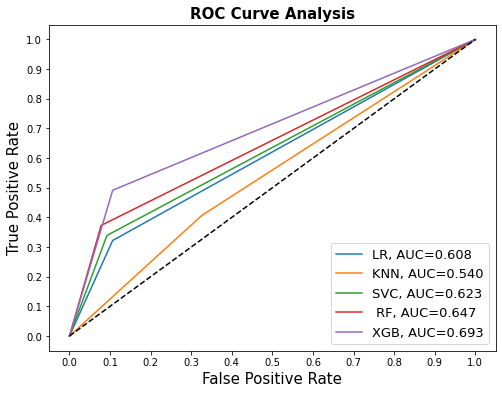

In [24]:
from sklearn.metrics import roc_curve, roc_auc_score

results_table = pd.DataFrame(columns = ['models', 'fpr','tpr','auc'])

predictions = {'LR': y_pred_log, 'KNN': y_pred_knn, 'SVC': y_pred_svc, ' RF': y_pred_rf, 'XGB': y_pred_xgb}

for key in predictions:
    fpr, tpr, _ = roc_curve(y_test, predictions[key])
    auc = roc_auc_score(y_test, predictions[key])
    
    results_table = results_table.append({'models': key,
                                         'fpr' : fpr,
                                         'tpr' : tpr,
                                         'auc' : auc}, ignore_index=True)
    
results_table.set_index('models', inplace=True)

print(results_table)

fig = plt.figure(figsize = (8,6))

for i in results_table.index:
    plt.plot(results_table.loc[i]['fpr'], 
             results_table.loc[i]['tpr'], 
             label = "{}, AUC={:.3f}".format(i, results_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color = 'black', linestyle = '--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop = {'size':13}, loc = 'lower right')

plt.show()